Q1.

In [2]:
import pandas as pd
from collections import Counter
import math

def load_dataset(file_path):
    """Loads the dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name="Sheet1")  # Load first sheet

def calculate_entropy(data, target_column):
    """Computes entropy for the given dataset based on the target column."""
    target_values = data[target_column]
    total_count = len(target_values)

    # Count occurrences of each unique value
    value_counts = Counter(target_values)

    # Compute entropy
    entropy_value = 0
    for count in value_counts.values():
        probability = count / total_count
        entropy_value -= probability * math.log2(probability)

    return entropy_value

if __name__ == "__main__":
    dataset_path = "/content/Judgment_Embeddings_InLegalBERT.xlsx"  # Correct dataset path
    dataset = load_dataset(dataset_path)  # Load dataset
    entropy_result = calculate_entropy(dataset, "Label")  # Use "Label" as target column
    print("Entropy of the dataset:", entropy_result)

Entropy of the dataset: 2.580022053909851


Q2.

In [3]:
import pandas as pd
from collections import Counter

def load_dataset(file_path):
    """Loads the dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name="Sheet1")  # Load first sheet

def calculate_gini_index(data, target_column):
    """Computes the Gini index for the given dataset based on the target column."""
    target_values = data[target_column]
    total_count = len(target_values)

    # Count occurrences of each unique value
    value_counts = Counter(target_values)

    # Compute Gini Index: 1 - sum(p^2)
    gini_index = 1 - sum((count / total_count) ** 2 for count in value_counts.values())

    return gini_index

if __name__ == "__main__":
    dataset_path = "/content/Judgment_Embeddings_InLegalBERT.xlsx"  # Correct dataset path
    dataset = load_dataset(dataset_path)  # Load dataset
    gini_result = calculate_gini_index(dataset, "Label")  # Use "Label" as target column
    print("Gini Index of the dataset:", gini_result)

Gini Index of the dataset: 0.7573491280485835


Q3.

In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
def load_dataset(file_path, sample_size=50):
    """Loads dataset and takes a small sample."""
    df = pd.read_excel(file_path, sheet_name="Sheet1")
    return df.sample(n=sample_size, random_state=42)  # Take a random sample of 50 rows

# Compute entropy
def compute_entropy(target_values):
    """Computes entropy of the target column."""
    total_count = len(target_values)
    value_counts = Counter(target_values)
    entropy = -sum((count / total_count) * math.log2(count / total_count)
                   for count in value_counts.values() if count > 0)
    return entropy

# Compute information gain
def compute_information_gain(data, feature, target_column):
    """Computes Information Gain for a given feature."""
    total_entropy = compute_entropy(data[target_column])
    unique_values = data[feature].unique()
    weighted_entropy = sum(
        (len(data[data[feature] == value]) / len(data)) * compute_entropy(data[data[feature] == value][target_column])
        for value in unique_values
    )
    return total_entropy - weighted_entropy

# Find best root feature
def find_best_root_feature(data, target_column):
    """Finds the feature with the highest Information Gain (root node)."""
    features = [col for col in data.columns if col != target_column]
    info_gains = {feature: compute_information_gain(data, feature, target_column) for feature in features}
    best_feature = max(info_gains, key=info_gains.get)
    return best_feature, info_gains

# Encode categorical features
def encode_features(df):
    """Encodes categorical features using Label Encoding."""
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == "object":
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return df, label_encoders

# Train and visualize Decision Tree
def train_and_visualize_decision_tree(data, target_column):
    """Trains a Decision Tree and visualizes it."""
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Decision Tree
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)

    # Visualize Decision Tree
    plt.figure(figsize=(12, 6))
    plot_tree(dt_model, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
    plt.title("Decision Tree Visualization (Small Sample)")
    plt.show()

if __name__ == "__main__":
    dataset_path = "/content/Judgment_Embeddings_InLegalBERT.xlsx"
    dataset = load_dataset(dataset_path, sample_size=50)  # Take a small subset

    target_column = "Label"  # Define the target variable

    # Encode categorical features
    dataset, encoders = encode_features(dataset)

    # Find best root feature
    best_feature, info_gains = find_best_root_feature(dataset, target_column)
    print("Information Gain for each feature:", info_gains)
    print(f"Root node (best feature): {best_feature}")

Information Gain for each feature: {'feature_0': 2.3944157180423082, 'feature_1': 2.3944157180423082, 'feature_2': 2.3944157180423082, 'feature_3': 2.3944157180423082, 'feature_4': 2.3944157180423082, 'feature_5': 2.3944157180423082, 'feature_6': 2.3944157180423082, 'feature_7': 2.3944157180423082, 'feature_8': 2.3944157180423082, 'feature_9': 2.3944157180423082, 'feature_10': 2.3944157180423082, 'feature_11': 2.3944157180423082, 'feature_12': 2.3944157180423082, 'feature_13': 2.3944157180423082, 'feature_14': 2.3944157180423082, 'feature_15': 2.3944157180423082, 'feature_16': 2.3944157180423082, 'feature_17': 2.3944157180423082, 'feature_18': 2.3944157180423082, 'feature_19': 2.3944157180423082, 'feature_20': 2.3944157180423082, 'feature_21': 2.3944157180423082, 'feature_22': 2.3944157180423082, 'feature_23': 2.3944157180423082, 'feature_24': 2.3944157180423082, 'feature_25': 2.3944157180423082, 'feature_26': 2.3944157180423082, 'feature_27': 2.3944157180423082, 'feature_28': 2.394415

Q4.

In [33]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "/content/Judgment_Embeddings_InLegalBERT.xlsx"
df = pd.read_excel(file_path)

# Display column names
print("Columns in dataset:", df.columns.tolist())

# Select a feature for binning (Make sure the feature exists)
feature_column = "feature_3"  # Change if needed
if feature_column not in df.columns:
    raise KeyError(f"Column '{feature_column}' not found in dataset. Available columns: {df.columns.tolist()}")

# Function for binning with function overloading using default parameters
def bin_feature(data, column, num_bins=5, binning_type="equal_width"):
    """
    Bins a continuous feature into categorical bins.

    Parameters:
    - data: Pandas DataFrame
    - column: Column to be binned (must exist in the DataFrame)
    - num_bins: Number of bins (default=5)
    - binning_type: "equal_width" (default) or "equal_frequency"

    Returns:
    - DataFrame with a new categorical column
    """
    if column not in data.columns:
        raise KeyError(f"Column '{column}' not found in dataset.")

    if binning_type == "equal_width":
        data[column + "_binned"] = pd.cut(data[column], bins=num_bins, labels=False)
    elif binning_type == "equal_frequency":
        data[column + "_binned"] = pd.qcut(data[column], q=num_bins, labels=False, duplicates="drop")
    else:
        raise ValueError("binning_type must be 'equal_width' or 'equal_frequency'")

    return data

# Apply binning function
df = bin_feature(df, feature_column, num_bins=4, binning_type="equal_width")

# Display results
print(df[[feature_column, feature_column + "_binned"]].head())


Columns in dataset: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_

Q5.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    """Encodes categorical features using Label Encoding."""
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == "object":
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return df, label_encoders

def train_decision_tree(df, target_column):
    """Trains a Decision Tree model."""
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Decision Tree
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)

    return dt_model, X.columns

if __name__ == "__main__":
    dataset, encoders = encode_features(dataset)  # Encode features
    target_column = "Label"

    # Train Decision Tree
    decision_tree_model, feature_names = train_decision_tree(dataset, target_column)

    print("Decision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


Q6.

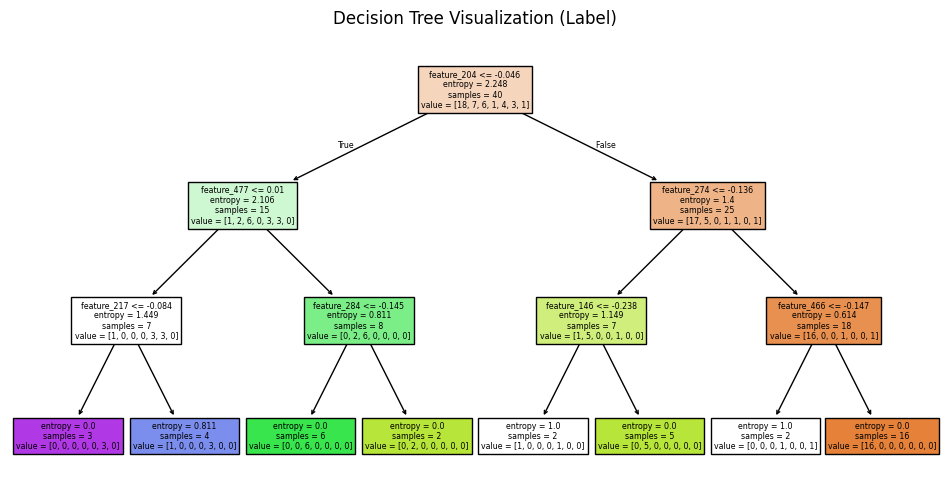

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def visualize_decision_tree(model, feature_names, target_column):
    """Visualizes the trained Decision Tree."""
    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=feature_names, filled=True)
    plt.title(f"Decision Tree Visualization ({target_column})")
    plt.show()

if __name__ == "__main__":
    visualize_decision_tree(decision_tree_model, feature_names, target_column)

Q7.

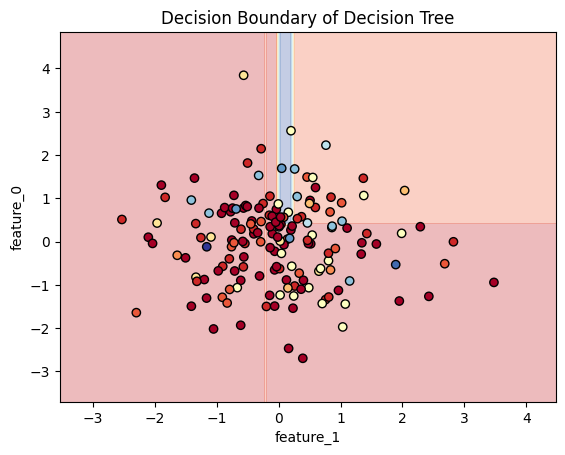

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
def load_dataset(file_path, sample_size=200):
    """Loads dataset and selects a sample."""
    df = pd.read_excel(file_path, sheet_name="Sheet1")  # Adjust sheet name if necessary
    return df.sample(n=sample_size, random_state=42)  # Take a smaller subset

# Choose dataset file
file_path = "/content/Judgment_Embeddings_InLegalBERT.xlsx"
df = load_dataset(file_path)

# Select two numerical features (Change these to actual column names)
feature_1 = "feature_0"  # Replace with correct feature column
feature_2 = "feature_1"  # Replace with correct feature column
target_column = "Label"  # Replace with correct target column

# Check if features exist in dataset
if feature_1 not in df.columns or feature_2 not in df.columns or target_column not in df.columns:
    print("Error: One or more selected columns do not exist in the dataset!")
else:
    # Drop missing values
    df = df[[feature_1, feature_2, target_column]].dropna()

    # Prepare features and labels
    X = df[[feature_1, feature_2]].values
    y = df[target_column].values

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data for better visualization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)

    # Function to plot decision boundary
    def plot_decision_boundary(model, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
        plt.xlabel(feature_2)
        plt.ylabel(feature_1)
        plt.title("Decision Boundary of Decision Tree")
        plt.show()

    # Plot the decision boundary
    plot_decision_boundary(clf, X_train, y_train)